## Quantifi Lending Club Test

In this notebook you will build out a simple data science workflow to solve a predictive problem.

We have included a dataset, 10K_Lending_Club_Loans.csv. This dataset comes courtesy of Lending Club, an online peer-to-peer lending website that matches those looking to borrow money with those with a little extra to lend out. Lending Club includes a number of descriptive features as well as a target (is_bad) indicating whether the loan was paid back successfully. 

Your task is to:
* Perform a simple exploratory data analysis
* Train a model to predict **is_bad**
* Evaluate accuracy
* **Answer questions about your model**

There is no right or wrong answer, this test is all about showcasing your specific style.

First, the dataset:

In [364]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt 

In [365]:
# Read the Lending Club Loans dataset
df = pd.read_csv("data/10K_Lending_Club_Loans.csv")

In [366]:
# Show the top five observations
df.head(5)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code,is_bad
0,500,500,36 months,8.07%,15.69,A,A4,NaN,< 1 year,RENT,18000.0,not verified,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=164346,"I currently live with my parents, study, and work part-time. The money will be used as additional funding to purchase a new computer .",other,buying a new computer,112xx,NY,4.27,0.0,11/1/03,0.0,0.0,0.0,4.0,0.0,0,0.0,4.0,f,NaN,1,0
1,500,500,36 months,9.01%,15.91,B,B2,NaN,< 1 year,RENT,2000.0,not verified,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=139940,I need this loan to help pay for training in a new job.,other,Loan for Job Training,727xx,AR,0.00,0.0,2/1/07,6.0,0.0,0.0,2.0,0.0,0,0.0,2.0,f,NaN,1,0
2,600,600,36 months,13.24%,20.29,D,D3,Ale House,3 years,RENT,14000.0,not verified,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=256481,To be used for legal fees,other,Unexpected legal expense,328xx,FL,22.03,0.0,1/1/06,0.0,0.0,0.0,2.0,0.0,195,65.0,3.0,f,NaN,1,0
3,600,600,36 months,11.54%,19.80,C,C5,NaN,< 1 year,RENT,5000.0,not verified,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=156142,"Hi everyone, I am in desperate need of $500 to pay rent for this past month. I have 1 week to come up with the money otherwise I will be evicted. My landlord has been very helpful, but she cant do anything more for me. I am a college student recently laid off work, I have tried everything else to try and come up with the money, from credit cards to cash advances and personal loans, but have had little luck as I am not currently employed. So please if anyone can do me this favor, I will be very grateful. Thank you.",other,Need to pay rent ASAP!,853xx,AZ,4.80,0.0,10/1/05,3.0,0.0,0.0,4.0,0.0,228,19.0,4.0,f,NaN,1,0
4,900,900,36 months,12.92%,30.29,D,D2,NaN,< 1 year,RENT,12760.0,not verified,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=324831,Our taxes are a little larger this year so I'd like to be able to pay them in full and then pay this loan off shortly afterwards without putting a strain on our finances.,debt_consolidation,Pay off Tax Bill,794xx,TX,25.11,0.0,7/1/99,0.0,NaN,NaN,4.0,0.0,3584,50.6,5.0,f,NaN,1,0


In [367]:
# Display the columns
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mths_since_last_major_derog', 'policy_code',
       'is_bad'],
      dtype='object')

## Perform exploratory data analysis here:
* Explore a few features visually
* Explore the target output

In [368]:
# View summary statistics of all columns
pd.set_option('display.max_columns', None)
df.describe(include='all')

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code,is_bad
count,10000.000000,10000.000000,10000,10000,10000.00000,10000,10000,9408,9741,10000,9999.000000,10000,10000,10000,6770,10000,9996,10000,10000,10000.000000,9995.000000,9995,9995.000000,3684.000000,840.000000,9995.000000,9995.000000,1.000000e+04,9977.000000,9995.000000,10000,0.0,10000.0,10000.000000
unique,NaN,NaN,2,359,NaN,7,35,8183,11,5,NaN,3,2,10000,6761,14,5676,720,50,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
top,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,not verified,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=279032,Debt Consolidation,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,11/1/98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
freq,NaN,NaN,7441,240,NaN,2952,742,37,2185,4745,NaN,4367,9998,1,3,4556,548,158,1748,NaN,NaN,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000,NaN,NaN,NaN
mean,11035.522500,10765.972500,NaN,NaN,321.43098,NaN,NaN,NaN,NaN,NaN,68203.011539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.338704,0.148174,NaN,1.066933,35.890337,61.652381,9.334567,0.060130,1.427101e+04,48.467474,22.089645,NaN,NaN,1.0,0.129500
std,7468.121308,7192.633069,NaN,NaN,210.62291,NaN,NaN,NaN,NaN,NaN,48590.252757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.754212,0.506270,NaN,1.476052,22.361443,46.189619,4.526590,0.251245,2.543791e+04,28.232809,11.622152,NaN,NaN,0.0,0.335769
min,500.000000,500.000000,NaN,NaN,15.69000,NaN,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,NaN,NaN,1.0,0.000000
25%,5000.000000,5000.000000,NaN,NaN,163.47000,NaN,NaN,NaN,NaN,NaN,40000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.160000,0.000000,NaN,0.000000,18.000000,0.000000,6.000000,0.000000,3.524500e+03,25.000000,13.000000,NaN,NaN,1.0,0.000000
50%,9600.000000,9250.000000,NaN,NaN,275.11000,NaN,NaN,NaN,NaN,NaN,58000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.410000,0.000000,NaN,1.000000,34.000000,86.000000,9.000000,0.000000,8.645500e+03,48.700000,20.000000,NaN,NaN,1.0,0.000000
75%,15000.000000,15000.000000,NaN,NaN,427.03750,NaN,NaN,NaN,NaN,NaN,82000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.692500,0.000000,NaN,2.000000,53.000000,101.000000,12.000000,0.000000,1.695225e+04,71.900000,29.000000,NaN,NaN,1.0,0.000000


In [369]:
# Display column types
df.dtypes

loan_amnt                      int64  
funded_amnt                    int64  
term                           object 
int_rate                       object 
installment                    float64
grade                          object 
sub_grade                      object 
emp_title                      object 
emp_length                     object 
home_ownership                 object 
annual_inc                     float64
verification_status            object 
pymnt_plan                     object 
url                            object 
desc                           object 
purpose                        object 
title                          object 
zip_code                       object 
addr_state                     object 
dti                            float64
delinq_2yrs                    float64
earliest_cr_line               object 
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [370]:
# Check for duplicates
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 34)


In [371]:
# Check columns for empty values
print(df.isnull().sum())

loan_amnt                      0    
funded_amnt                    0    
term                           0    
int_rate                       0    
installment                    0    
grade                          0    
sub_grade                      0    
emp_title                      592  
emp_length                     259  
home_ownership                 0    
annual_inc                     1    
verification_status            0    
pymnt_plan                     0    
url                            0    
desc                           3230 
purpose                        0    
title                          4    
zip_code                       0    
addr_state                     0    
dti                            0    
delinq_2yrs                    5    
earliest_cr_line               5    
inq_last_6mths                 5    
mths_since_last_delinq         6316 
mths_since_last_record         9160 
open_acc                       5    
pub_rec                        5    
r

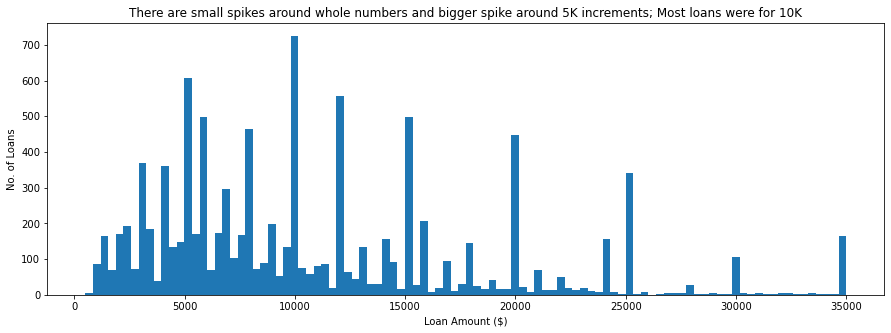

In [372]:
# Plot loan amount histogram
plt.figure(figsize=(15,5))
plt.hist(df['loan_amnt'], bins=100);
plt.title("There are small spikes around whole numbers and bigger spike around 5K increments; Most loans were for 10K")
plt.ylabel('No. of Loans')
plt.xlabel('Loan Amount ($)');

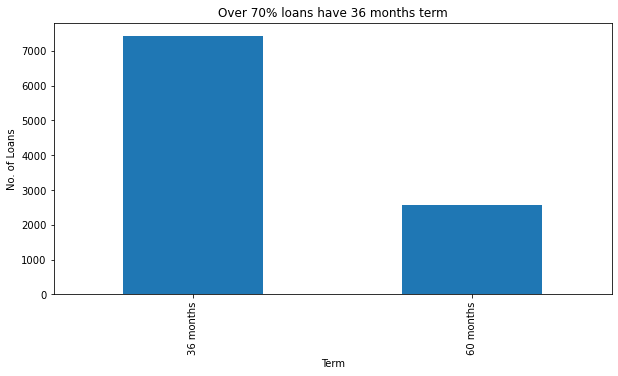

In [373]:
# Get value counts for term categories
df['term'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Over 70% loans have 36 months term")
plt.ylabel('No. of Loans')
plt.xlabel('Term');

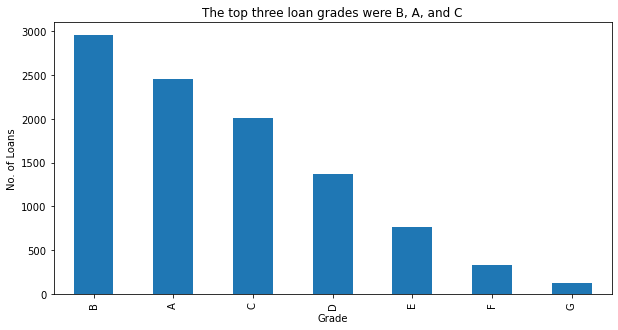

In [374]:
# Get value counts for grade categories
df['grade'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("The top three loan grades were B, A, and C")
plt.ylabel('No. of Loans')
plt.xlabel('Grade');

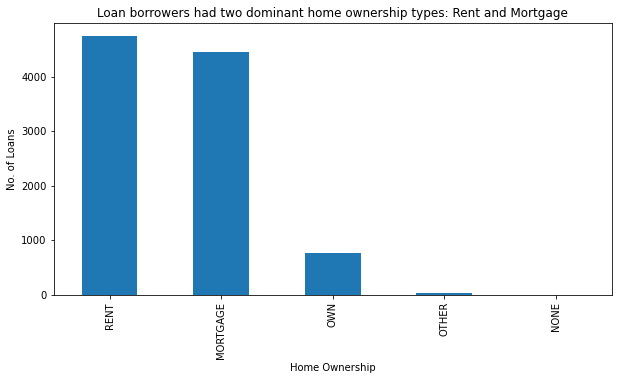

In [375]:
# Get value counts for home ownership categories
df['home_ownership'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Loan borrowers had two dominant home ownership types: Rent and Mortgage")
plt.ylabel('No. of Loans')
plt.xlabel('Home Ownership');

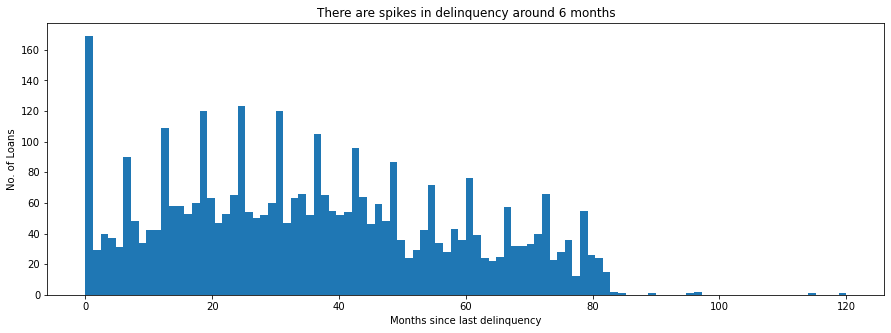

In [376]:
# Plot months since last delinquency histogram
plt.figure(figsize=(15,5))
plt.hist(df['mths_since_last_delinq'], bins=100);
plt.title("There are spikes in delinquency around 6 months")
plt.ylabel('No. of Loans')
plt.xlabel('Months since last delinquency');

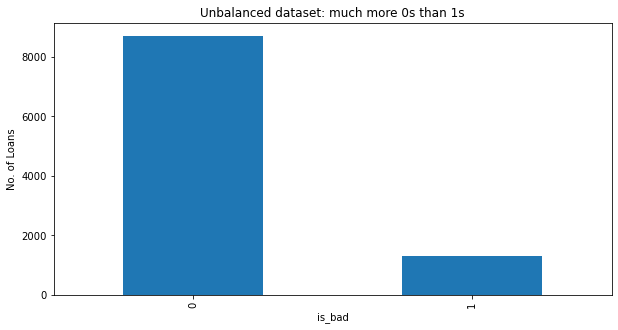

In [378]:
# Get value counts for target variable, is_bad
df['is_bad'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Unbalanced dataset: much more 0s than 1s")
plt.ylabel('No. of Loans')
plt.xlabel('is_bad');

## Clean dataset here
* Remove columns, transform variables, etc

In [379]:
# Remove columns that uniquely identify the observation or contain empty values for the most part
df = df[df.columns[~df.columns.isin(['pymnt_plan', 'term', 'url', 'desc',
'purpose', 'title', 'zip_code', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
'mnths_since_last_record', 'initial_list_status', 'mths_since_last_major_derog',
'mths_since_last_delinq', 'mths_since_last_record', 'policy_code', 'emp_title', 'int_rate'])]]

In [380]:
# Check empty values for the remaining columns
df.count()

loan_amnt              10000
funded_amnt            10000
installment            10000
grade                  10000
sub_grade              10000
emp_length             9741 
home_ownership         10000
annual_inc             9999 
verification_status    10000
addr_state             10000
dti                    10000
open_acc               9995 
pub_rec                9995 
revol_bal              10000
revol_util             9977 
total_acc              9995 
is_bad                 10000
dtype: int64

In [381]:
# Drop rows having at least one column with a null value
df = df.dropna()

In [382]:
# Check for empty values after running the above transformation
df.count()

loan_amnt              9720
funded_amnt            9720
installment            9720
grade                  9720
sub_grade              9720
emp_length             9720
home_ownership         9720
annual_inc             9720
verification_status    9720
addr_state             9720
dti                    9720
open_acc               9720
pub_rec                9720
revol_bal              9720
revol_util             9720
total_acc              9720
is_bad                 9720
dtype: int64

In [383]:
# One hot encode categorical features
df_ohv = pd.get_dummies(df,columns=['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'addr_state'],drop_first =True)

In [384]:
# Check the one hot encoded table
df_ohv.head()

,loan_amnt,funded_amnt,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,is_bad,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_VERIFIED - income source,verification_status_not verified,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,500,500,15.69,18000.0,4.27,4.0,0.0,0,0.0,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,500,500,15.91,2000.0,0.00,2.0,0.0,0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,600,600,20.29,14000.0,22.03,2.0,0.0,195,65.0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,600,600,19.80,5000.0,4.80,4.0,0.0,228,19.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,900,900,30.29,12760.0,25.11,4.0,0.0,3584,50.6,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


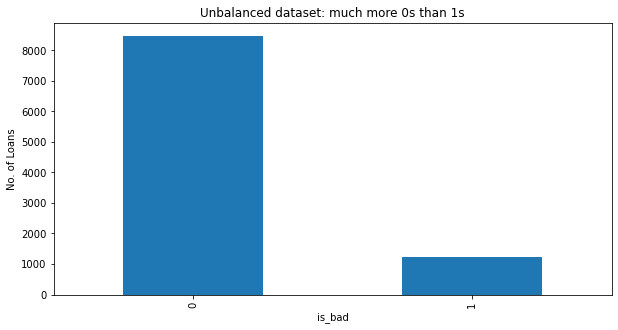

In [385]:
# Get value counts for target variable, is_bad
df_ohv['is_bad'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Unbalanced dataset: much more 0s than 1s")
plt.ylabel('No. of Loans')
plt.xlabel('is_bad');

In [386]:
# Move target variable from feature set to y
y = df_ohv['is_bad']
df_ohv.drop('is_bad', axis=1, inplace=True)

## Fit a model here
* Use whatever model or library you want

In [387]:
# Normalize data to balance numerical variables
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(df_ohv)

In [388]:
# Train test split with test size 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state = 1)

In [389]:
# class balanced random forest for imbalanced classification
from sklearn.ensemble import RandomForestClassifier

# Train model taking into account the imbalanced dataset
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions using the model
predictions = model.predict(X_test)

## Evaluate your model accuracy here
* Print your test/train accuracy (whatever it is)

In [390]:
# Display accuracy and F1 score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Accuracy score:',accuracy_score(y_test, predictions))
print('F1 score:',f1_score(y_test, predictions))

Accuracy score: 0.8641975308641975
F1 score: 0.01197604790419162


## Explore your model and answer these questions
You can answer using text, code, or both. 

* **What is the most important feature for your model?**

In [395]:
# Use Random Forest Classifier to calculate feature importance based on the training set
importances = model.feature_importances_
sorted_idx = np.argsort(importances)

features = df_ohv.columns
print(features[sorted_idx][-1])

revol_bal


Revolving Balance is the most important feature.

* **Why did you pick this model?**

I picked the Random Forest model because it is based on decision trees and decision trees are generally good with imbalanced datasets.

* **What were some of the limitations of your approach?**

- Random forests can be biased with categorical variables
- Training can be slow, especially with a large dataset

* **What would you like to try next?**

- Apply SMOTE to deal with imbalanced dataset
- Feature engineering
- Hyperparameter tuning of current RF model
    - Number of trees in the forest
    - Max. no. of features considered for splitting a node
    - Max. depth in each decision tree
    - Method for sampling data points
- Other Algorithms:
    - Decision trees
    - XGBoost
    - Logistic Regression
    - Naive Bayes
    - K-NN

## Conclusion
Save this notebook, it will be your submission. Thank you for participating!